# bcal neutron imagery
This notebook reads the output of the physics simulation of the GlueX detector in response to single high-energy neutrons come from the liquid hydrogen target. Neutrons are fired from the photon beam - target overlap region that lies close to the long axis of the hydrogen target at its nominal position in the GlueX spectrometer. The neutrons are distributed uniformly in energy and angle over the range from 0 to 1 GeV kinetic energy, between lab polar angles 0 and 160 degrees from the beam axis, and over the full range 0 - 360 degrees in azimuth. The images display the ionization energy deposited in the barrel electromagnetic calorimeter (BCAL) projected onto the xy plane, as a color-coded heat map. The deposited energy is the integral over all times for a given primary neutron event. To make the images more compact, only the BCAL module that was directly along the flight path of the neutron and its two neighbors on either side are included in the images. The third dimension of the hit position along the length of the modules is not encoded in the images.


## Define the module geometry
The BCAL consists of a complete cylinder divided equally along its azimuth in identical module. Each module is further divided into radial rings called layers, and each layer is subdivided along its azimuth into sectors. The table Rsectors gives the inner radius of each layer in sectors. All of the other dimensions are determined by the geometry, assuming no gaps between neighboring sectors and layers.

In [1]:
Nmodules = 48
Nsectors = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Rsectors = [65.0423, 67.10986, 69.17742, 71.24498,
            73.31254, 75.3801, 77.44766, 79.92162,
            82.39558, 84.86954, 87.3435]

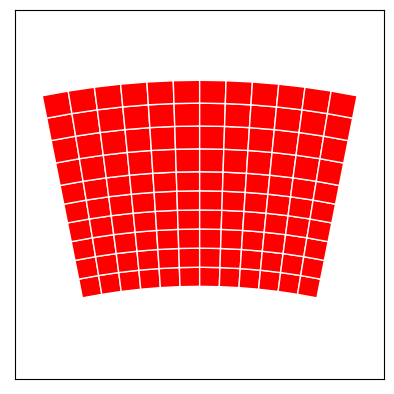

In [2]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.transforms as mtransforms

fig,ax = plt.subplots()

sectors = {}
corners = {}

for layer in range(len(Nsectors)):
    for module in range(-1,2):
        phi = (module - 0.5) * 2*math.pi/Nmodules
        for sector in range(Nsectors[layer]):
            dphi = 2*math.pi/Nmodules / Nsectors[layer]
            r0 = Rsectors[layer]
            r1 = Rsectors[layer + 1]
            mls = f"{module}:{layer}:{sector}"
            corners[mls] = np.array([[r0 * math.sin(phi), r0 * math.cos(phi)],
                                     [r1 * math.sin(phi), r1 * math.cos(phi)],
                                     [r1 * math.sin(phi + dphi), r1 * math.cos(phi + dphi)],
                                     [r0 * math.sin(phi + dphi), r0 * math.cos(phi + dphi)],
                                     [r0 * math.sin(phi), r0 * math.cos(phi)]])
            sectors[mls] = Polygon(corners[mls], facecolor='r', edgecolor='w')
            ax.add_patch(sectors[mls])
            phi += dphi
ax.set_xlim([-20,20])
ax.set_ylim([55,95])
ax.set_aspect("equal")
plt.xticks([])
plt.yticks([])
plt.show()

## Choose a color map
To display deposited energy as a hue, we need to choose a color map. Below we experiment with different color maps to see what looks best.

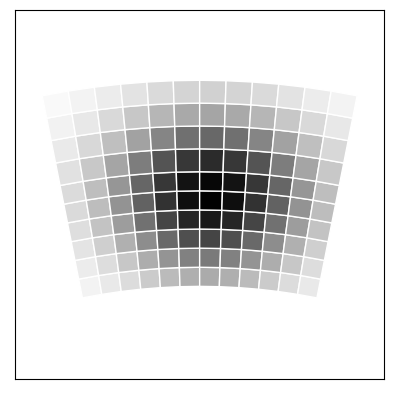

In [8]:
#colormap = matplotlib.cm.get_cmap('YlOrRd')
colormap = matplotlib.cm.get_cmap('binary')
rmax = 75
phimax = 0
rsigma = 6
phisigma = 0.1

fig,ax = plt.subplots()
heatmap = {}

for mls in corners:
    module, layer, sector = [int(index) for index in mls.split(':')]
    phi = (module + sector/Nsectors[layer] - 0.5) * 2*math.pi/Nmodules
    energy = math.exp(-0.5 * (((Rsectors[layer]/2 + Rsectors[layer + 1]/2 - rmax) / rsigma)**2 +
                              ((phi - phimax) / phisigma)**2))
    heatmap[mls] = Polygon(corners[mls], edgecolor='w', facecolor=colormap(energy))
    ax.add_patch(heatmap[mls])
ax.set_xlim([-20,20])
ax.set_ylim([55,95])
ax.set_aspect("equal")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
import sys
sys.path.append("/cvmfs/oasis.opensciencegrid.org/gluex/halld_recon/Linux_CentOS7-x86_64-gcc6.3.1/python3")
import hddm_s

#!{sys.executable} -m pip install --user wget
import wget
import os

event 71000 1 has no bcal hits
event 71000 2 has no bcal hits
display event 71000 3 with neutron kinetic energy 0.349 GeV


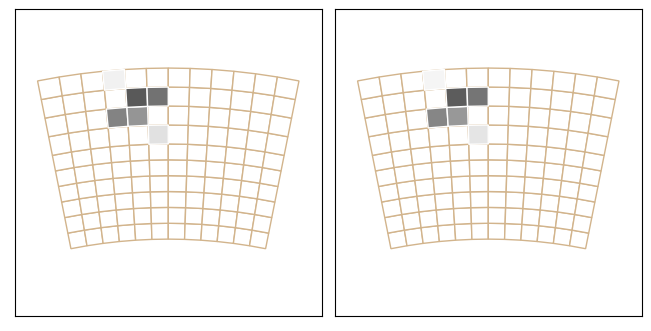

event 71000 4 has no bcal hits
event 71000 5 has no bcal hits
display event 71000 6 with neutron kinetic energy 0.200 GeV


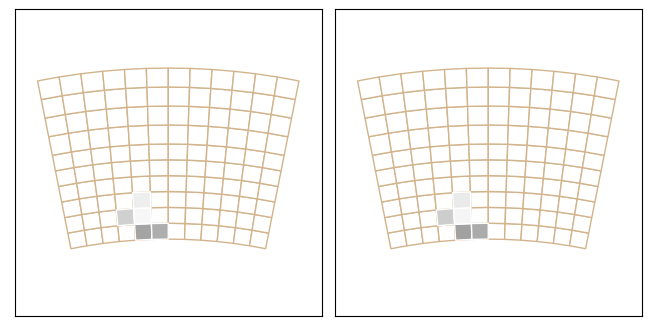

event 71000 7 has no bcal hits
event 71000 8 has no bcal hits
event 71000 9 has no bcal hits
display event 71000 10 with neutron kinetic energy 0.167 GeV


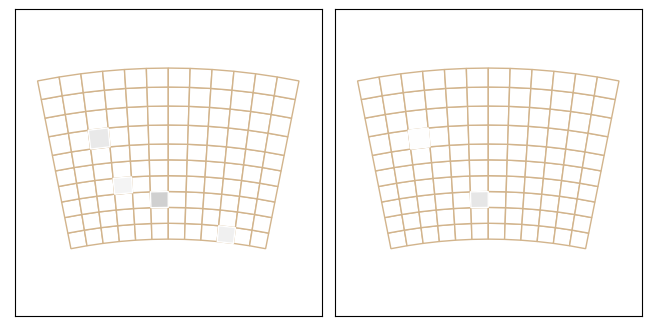

display event 71000 11 with neutron kinetic energy 0.036 GeV


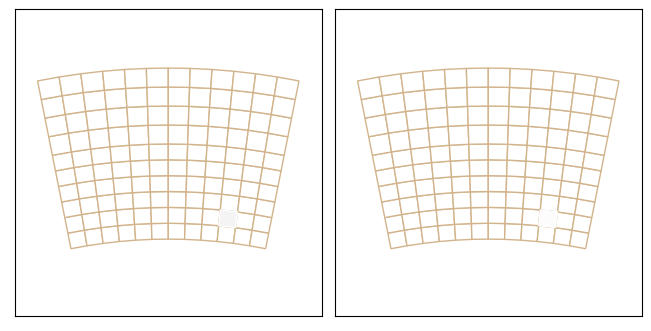

display event 71000 12 with neutron kinetic energy 0.115 GeV


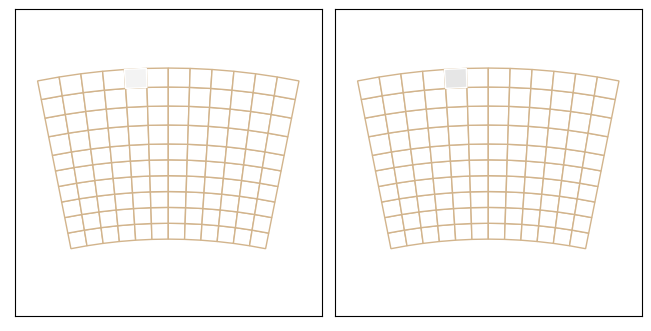

event 71000 13 has no bcal hits
event 71000 14 has no bcal hits
event 71000 15 has no bcal hits
display event 71000 16 with neutron kinetic energy 0.086 GeV


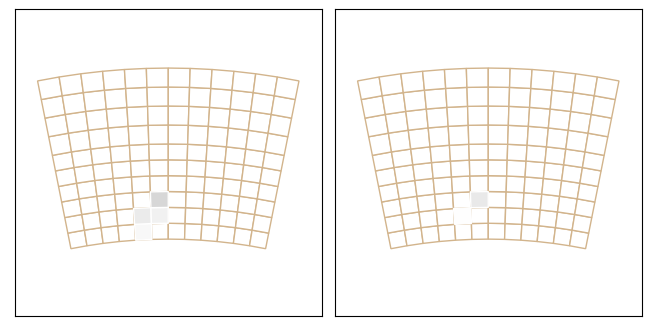

event 71000 17 has no bcal hits
display event 71000 18 with neutron kinetic energy 0.215 GeV


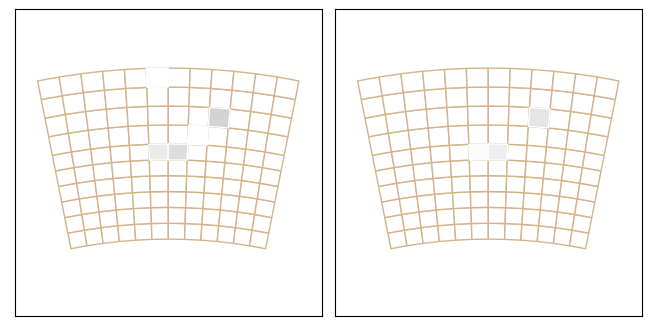

event 71000 19 has no bcal hits
event 71000 20 has no bcal hits
event 71000 21 has no bcal hits
display event 71000 22 with neutron kinetic energy 0.092 GeV


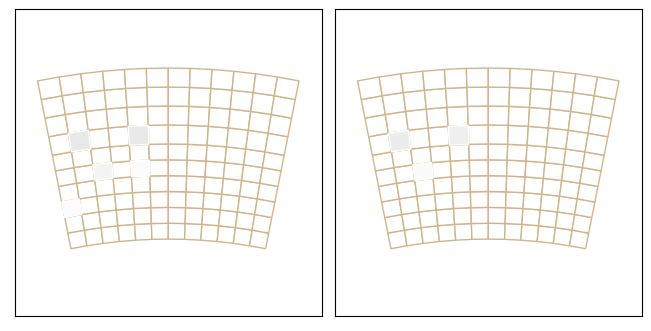

display event 71000 23 with neutron kinetic energy 0.035 GeV


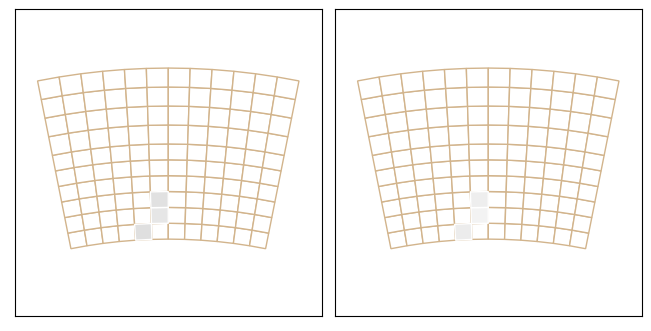

display event 71000 24 with neutron kinetic energy 0.418 GeV


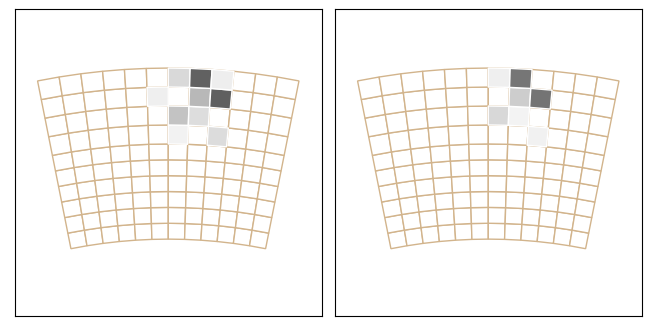

event 71000 25 has no bcal hits
event 71000 26 has no bcal hits
early exit after 26 events from input file particle_gun021_001.hddm
event 71000 1 has no bcal hits
event 71000 2 has no bcal hits
event 71000 3 has no bcal hits
event 71000 4 has no bcal hits
event 71000 5 has no bcal hits
display event 71000 6 with neutron kinetic energy 0.353 GeV


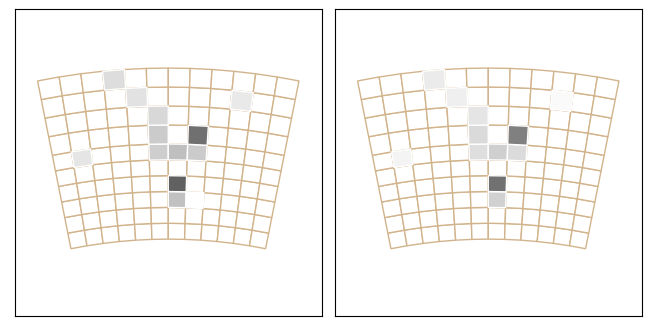

display event 71000 7 with neutron kinetic energy 0.232 GeV


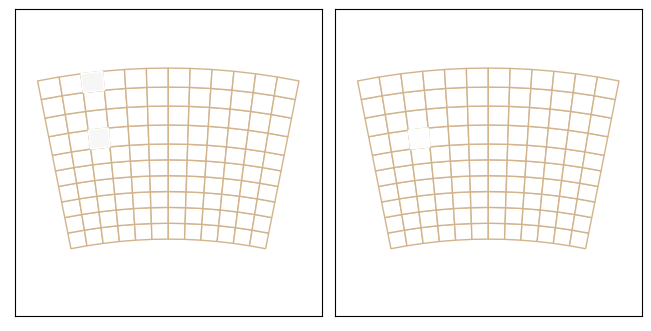

event 71000 8 has no bcal hits
display event 71000 9 with neutron kinetic energy 0.342 GeV


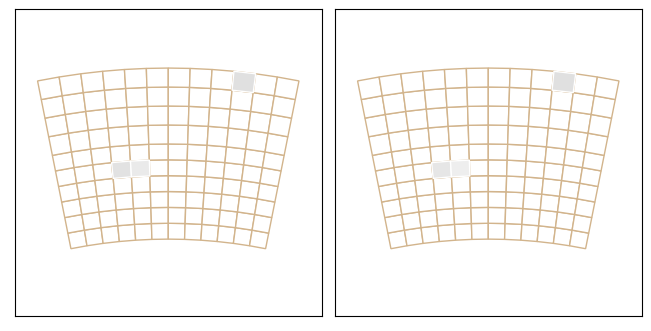

display event 71000 10 with neutron kinetic energy 0.043 GeV


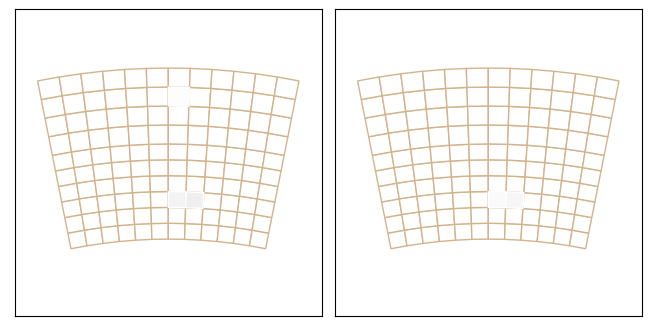

display event 71000 11 with neutron kinetic energy 0.043 GeV


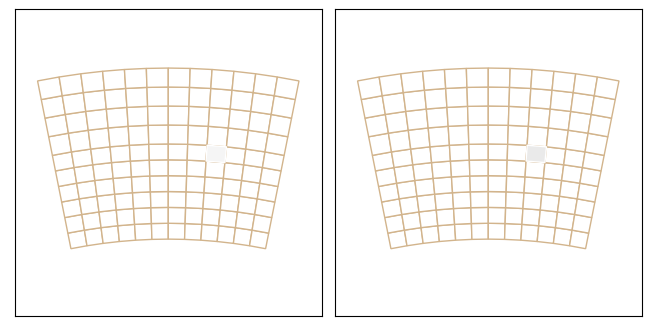

event 71000 12 has no bcal hits
event 71000 13 has no bcal hits
display event 71000 14 with neutron kinetic energy 0.007 GeV


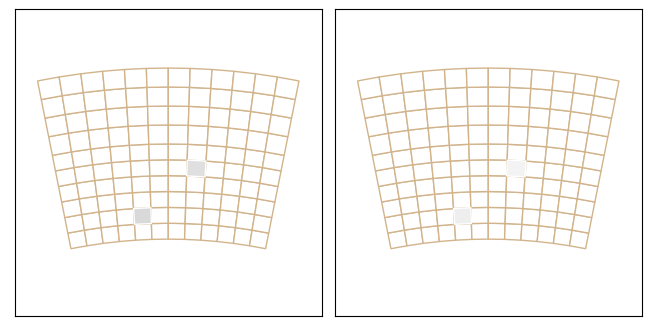

display event 71000 15 with neutron kinetic energy 0.273 GeV


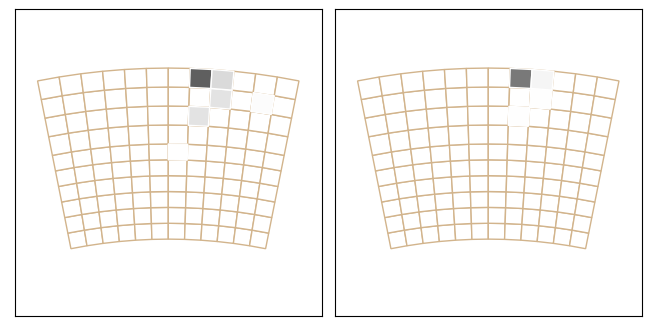

event 71000 16 has no bcal hits
display event 71000 17 with neutron kinetic energy 0.315 GeV


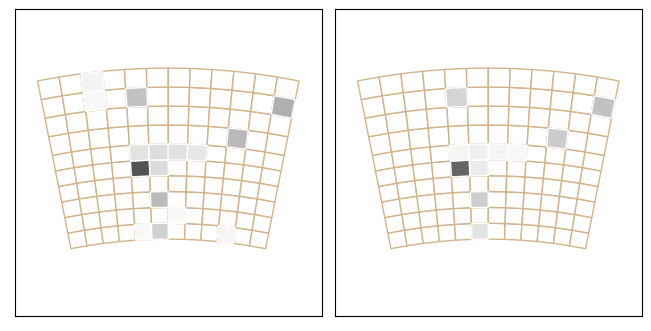

display event 71000 18 with neutron kinetic energy 0.045 GeV


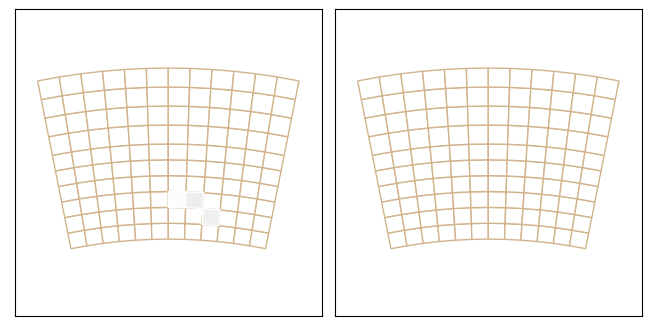

display event 71000 19 with neutron kinetic energy 0.193 GeV


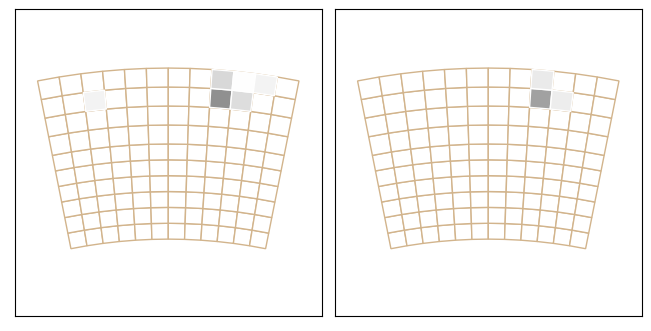

event 71000 20 has no bcal hits
event 71000 21 has no bcal hits
event 71000 22 has no bcal hits
display event 71000 23 with neutron kinetic energy 0.046 GeV


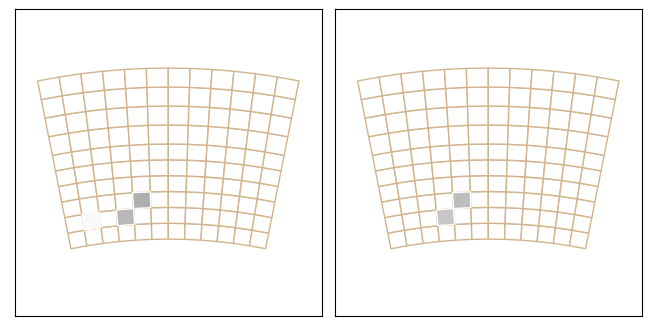

display event 71000 24 with neutron kinetic energy 0.034 GeV


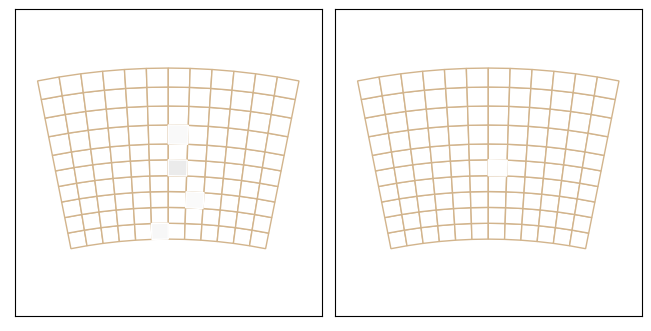

event 71000 25 has no bcal hits
event 71000 26 has no bcal hits
early exit after 26 events from input file particle_gun021_002.hddm
display event 71000 1 with neutron kinetic energy 0.035 GeV


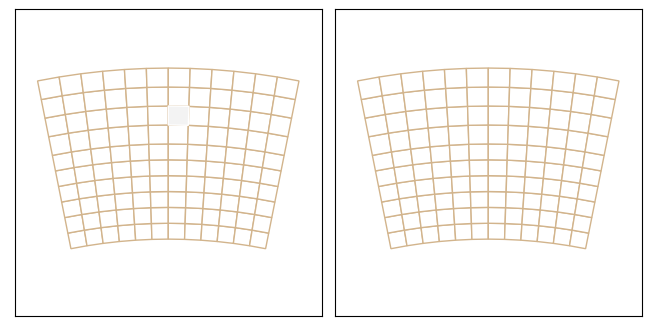

event 71000 2 has no bcal hits
display event 71000 3 with neutron kinetic energy 0.200 GeV


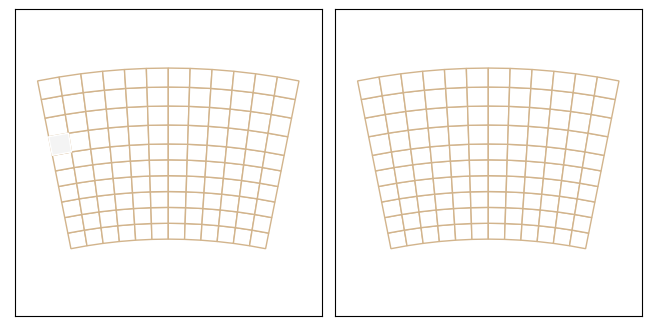

event 71000 4 has no bcal hits
display event 71000 5 with neutron kinetic energy 0.412 GeV


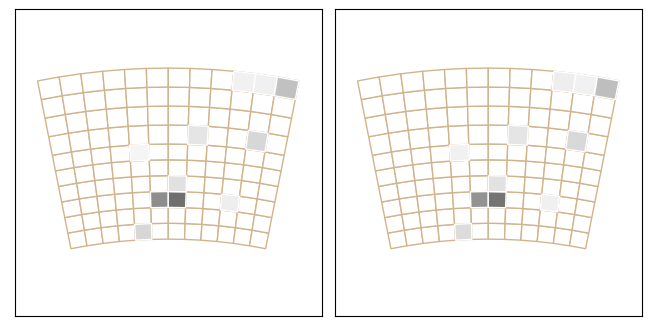

event 71000 6 has no bcal hits
display event 71000 7 with neutron kinetic energy 0.391 GeV


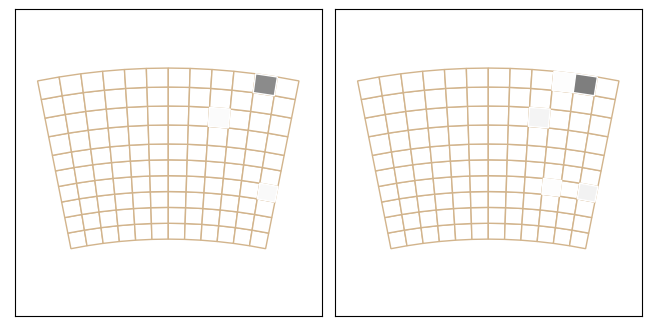

display event 71000 8 with neutron kinetic energy 0.285 GeV


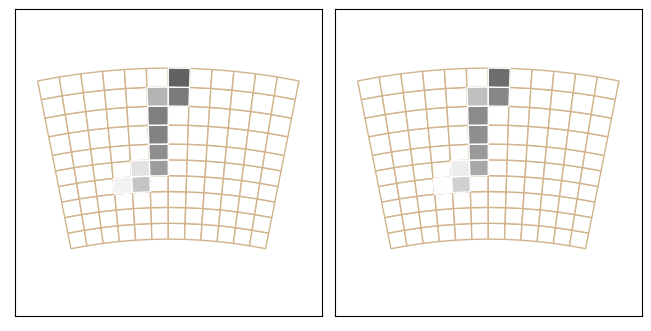

display event 71000 9 with neutron kinetic energy 0.010 GeV


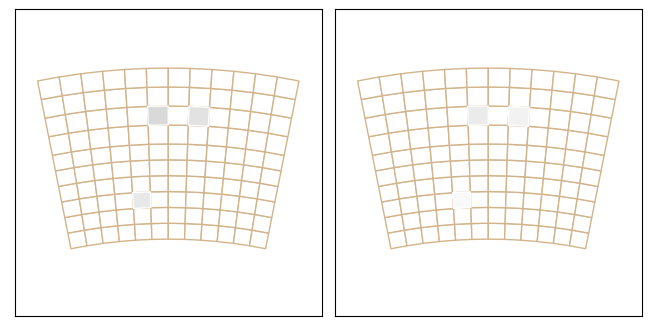

display event 71000 10 with neutron kinetic energy 0.017 GeV


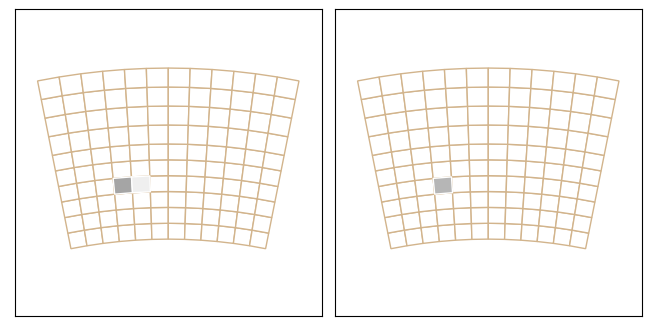

display event 71000 11 with neutron kinetic energy 0.382 GeV


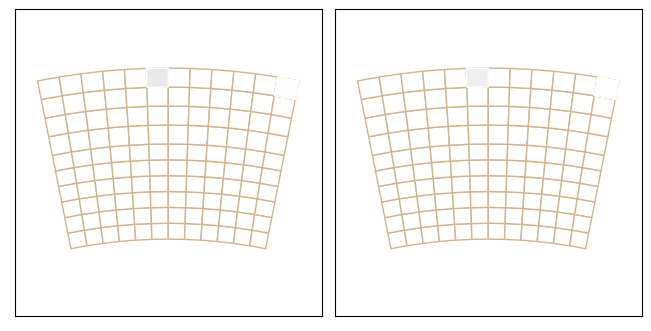

display event 71000 12 with neutron kinetic energy 0.005 GeV


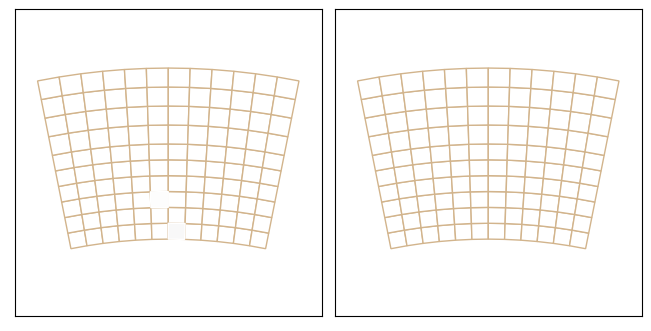

event 71000 13 has no bcal hits
event 71000 14 has no bcal hits
event 71000 15 has no bcal hits
event 71000 16 has no bcal hits
display event 71000 17 with neutron kinetic energy 0.253 GeV


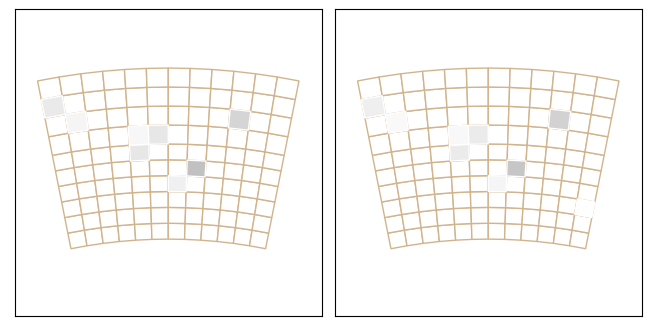

display event 71000 18 with neutron kinetic energy 0.149 GeV


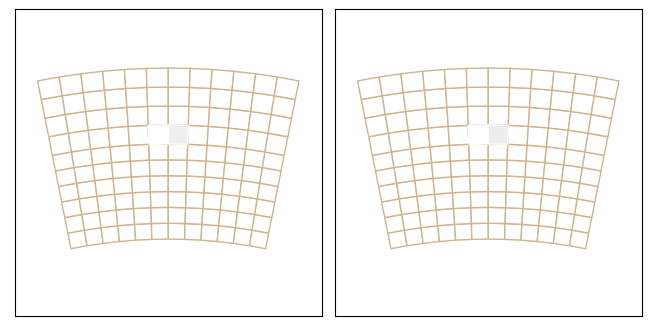

display event 71000 19 with neutron kinetic energy 0.091 GeV


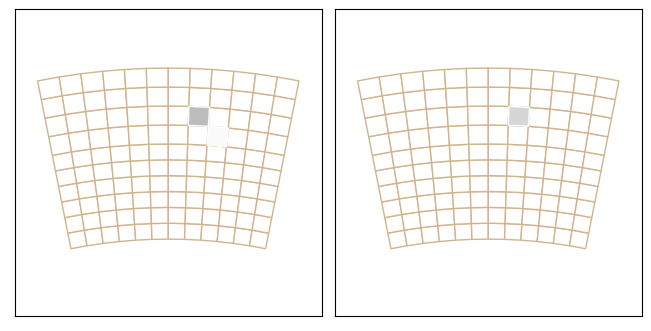

display event 71000 20 with neutron kinetic energy 0.004 GeV


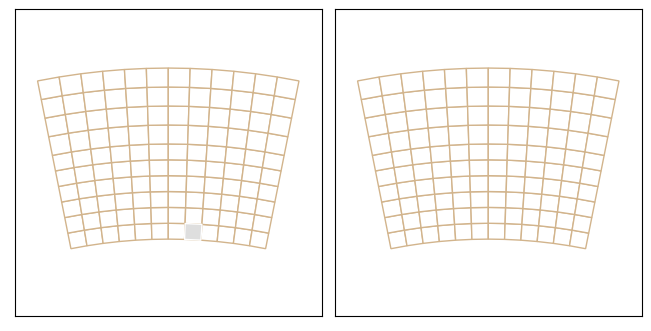

event 71000 21 has no bcal hits
display event 71000 22 with neutron kinetic energy 0.242 GeV


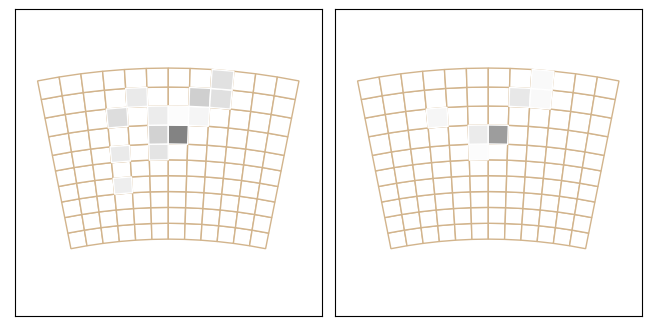

display event 71000 23 with neutron kinetic energy 0.088 GeV


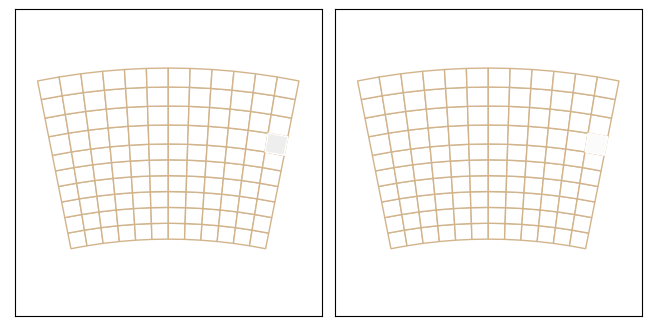

display event 71000 24 with neutron kinetic energy 0.128 GeV


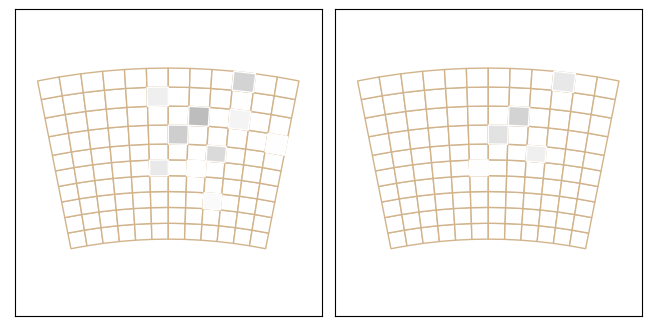

event 71000 25 has no bcal hits
display event 71000 26 with neutron kinetic energy 0.148 GeV


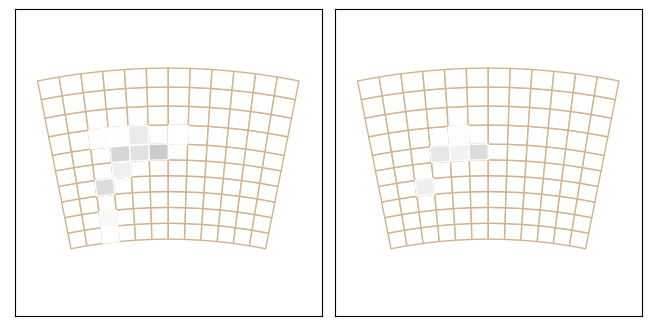

early exit after 26 events from input file particle_gun021_003.hddm
event 71000 1 has no bcal hits
display event 71000 2 with neutron kinetic energy 0.331 GeV


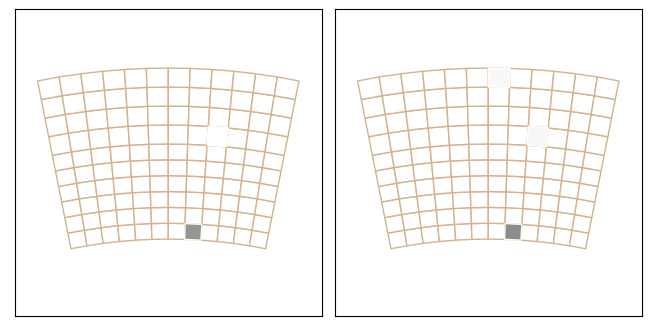

event 71000 3 has no bcal hits
event 71000 4 has no bcal hits
event 71000 5 has no bcal hits
event 71000 6 has no bcal hits
display event 71000 7 with neutron kinetic energy 0.053 GeV


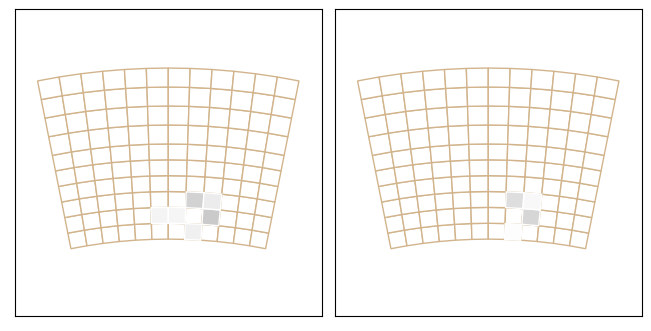

event 71000 8 has no bcal hits
display event 71000 9 with neutron kinetic energy 0.130 GeV


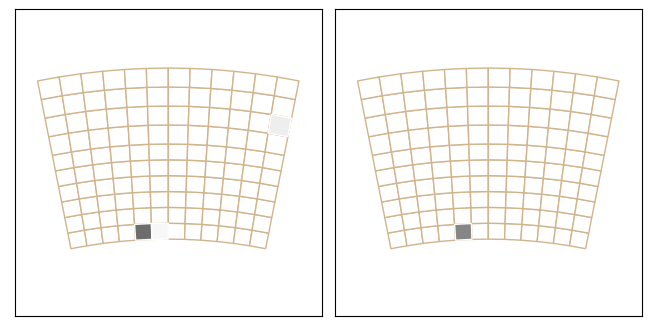

display event 71000 10 with neutron kinetic energy 0.236 GeV


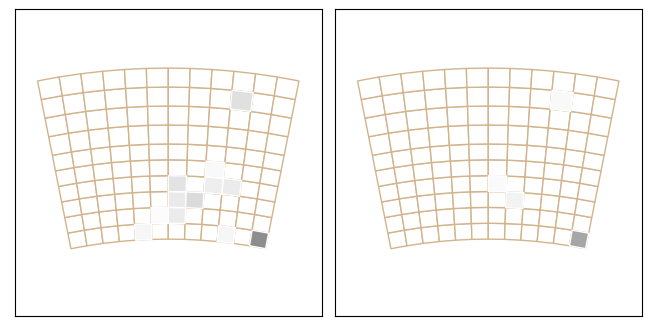

event 71000 11 has no bcal hits
event 71000 12 has no bcal hits
display event 71000 13 with neutron kinetic energy 0.369 GeV


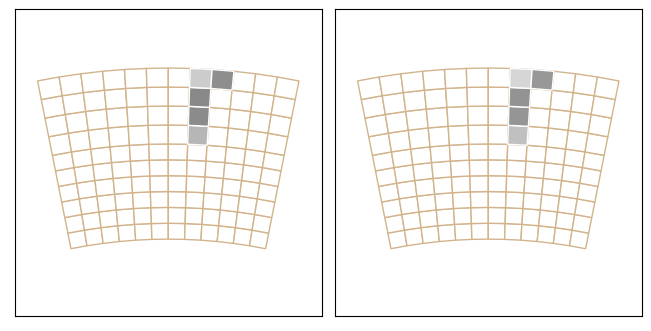

event 71000 14 has no bcal hits
event 71000 15 has no bcal hits
event 71000 16 has no bcal hits
event 71000 17 has no bcal hits
display event 71000 18 with neutron kinetic energy 0.129 GeV


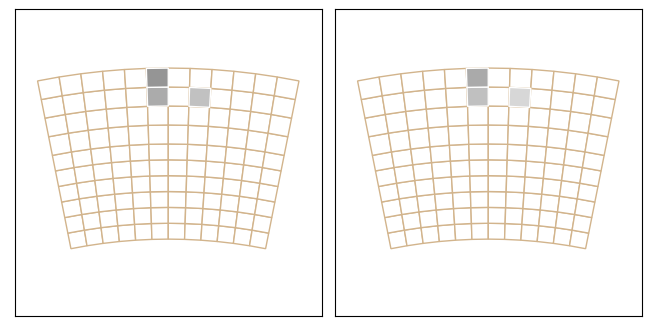

event 71000 19 has no bcal hits
display event 71000 20 with neutron kinetic energy 0.096 GeV


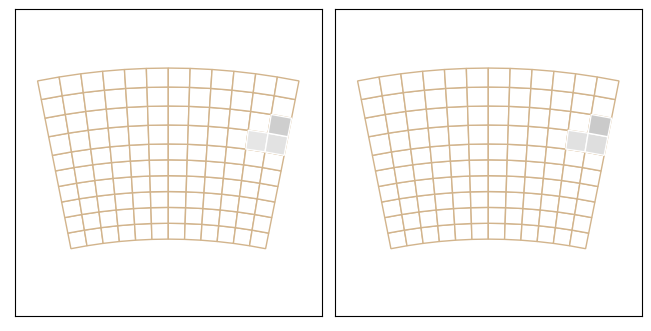

display event 71000 21 with neutron kinetic energy 0.096 GeV


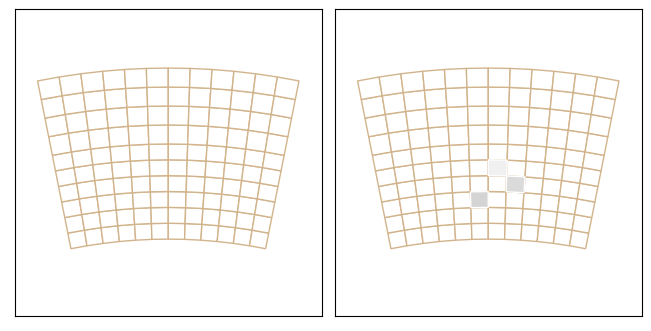

event 71000 22 has no bcal hits
display event 71000 23 with neutron kinetic energy 0.056 GeV


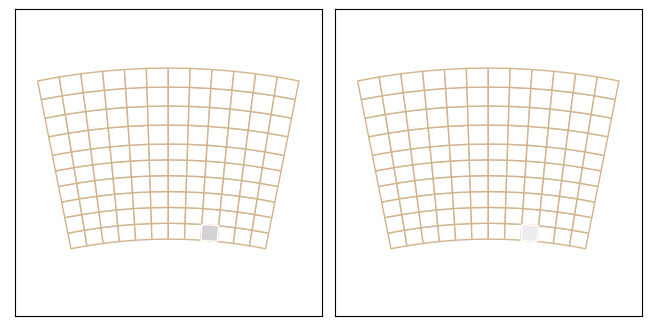

event 71000 24 has no bcal hits
display event 71000 25 with neutron kinetic energy 0.237 GeV


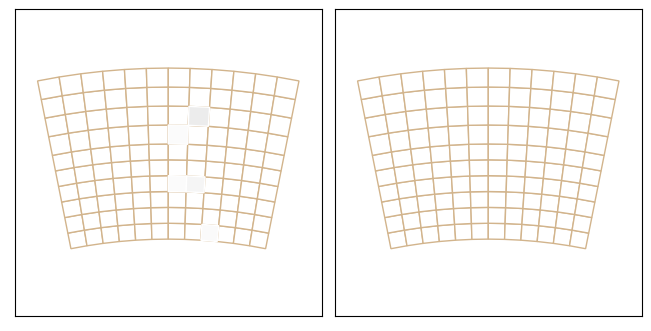

display event 71000 26 with neutron kinetic energy 0.181 GeV


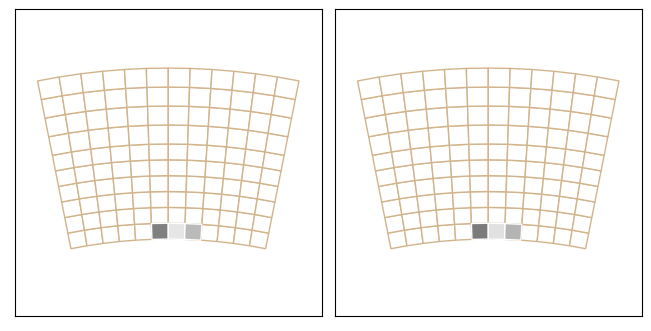

early exit after 26 events from input file particle_gun021_004.hddm
display event 71000 1 with neutron kinetic energy 0.139 GeV


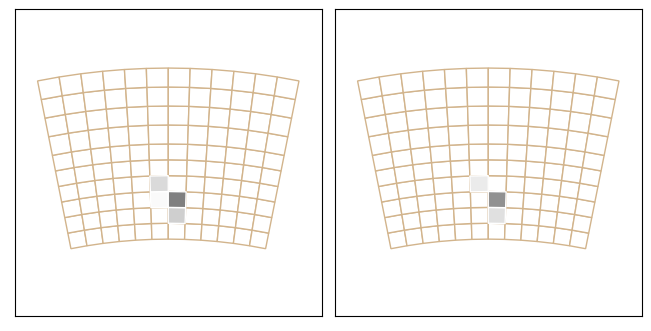

event 71000 2 has no bcal hits
display event 71000 3 with neutron kinetic energy 0.283 GeV


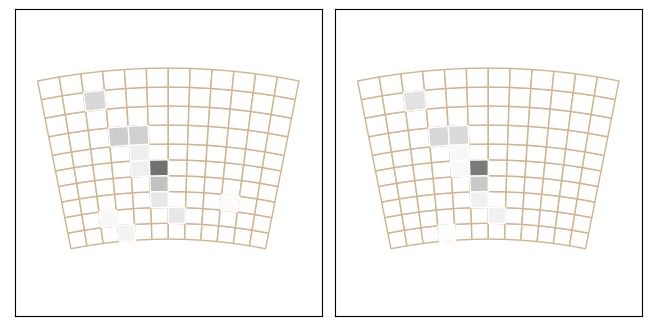

event 71000 4 has no bcal hits
event 71000 5 has no bcal hits
display event 71000 6 with neutron kinetic energy 0.058 GeV


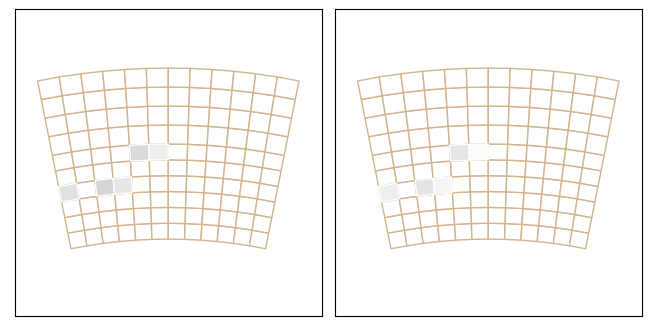

display event 71000 7 with neutron kinetic energy 0.235 GeV


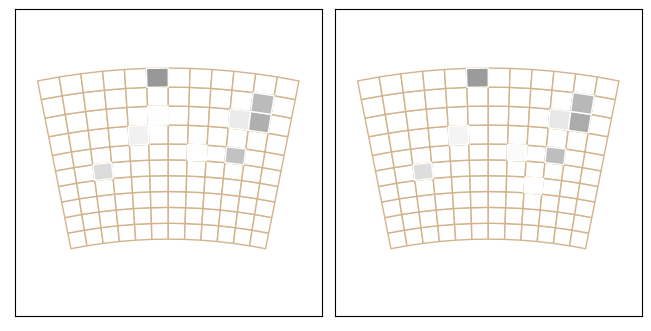

display event 71000 8 with neutron kinetic energy 0.162 GeV


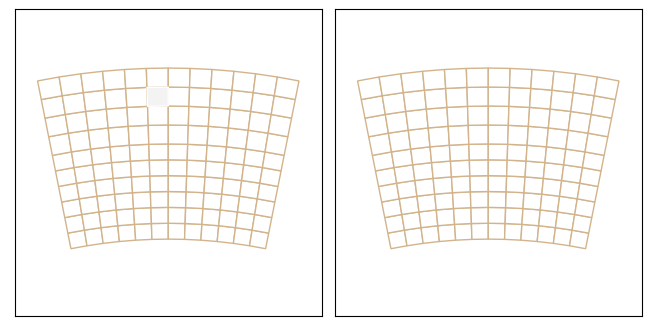

event 71000 9 has no bcal hits
display event 71000 10 with neutron kinetic energy 0.159 GeV


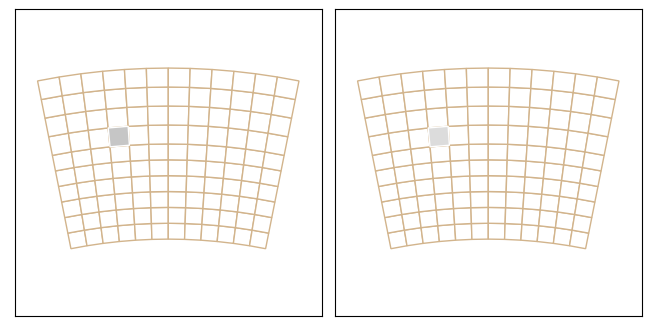

display event 71000 11 with neutron kinetic energy 0.042 GeV


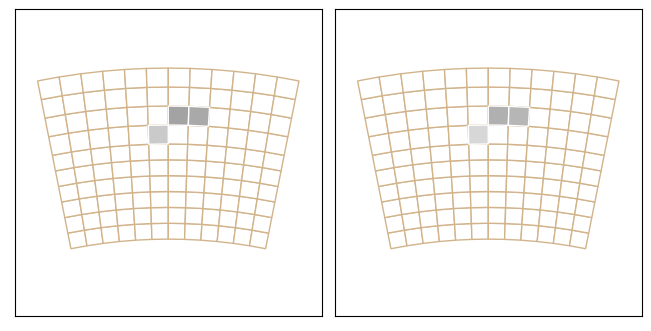

event 71000 12 has no bcal hits
event 71000 13 has no bcal hits
event 71000 14 has no bcal hits
display event 71000 15 with neutron kinetic energy 0.410 GeV


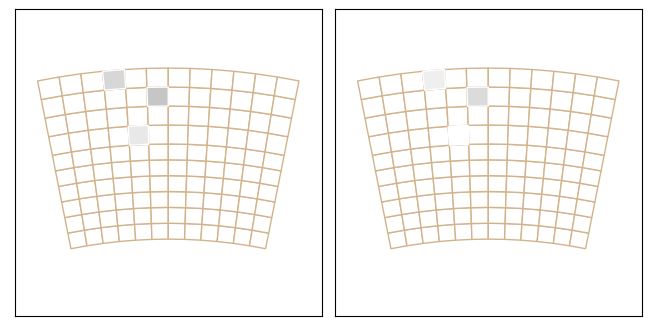

event 71000 16 has no bcal hits
display event 71000 17 with neutron kinetic energy 0.038 GeV


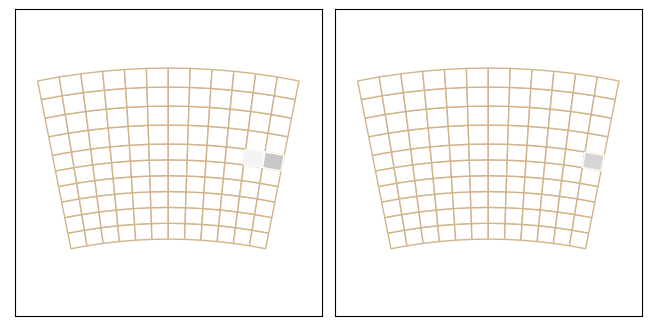

display event 71000 18 with neutron kinetic energy 0.378 GeV


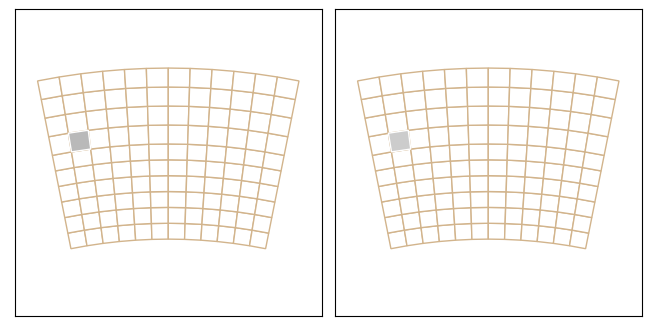

display event 71000 19 with neutron kinetic energy 0.278 GeV


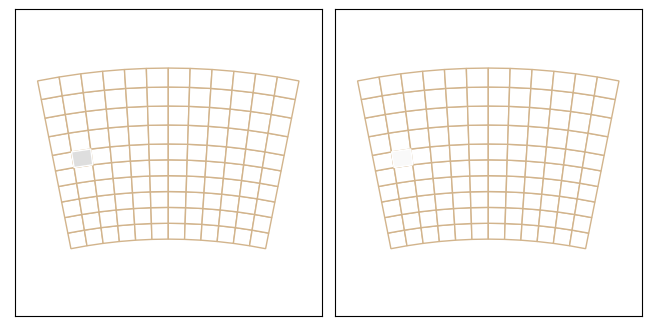

event 71000 20 has no bcal hits
display event 71000 21 with neutron kinetic energy 0.362 GeV


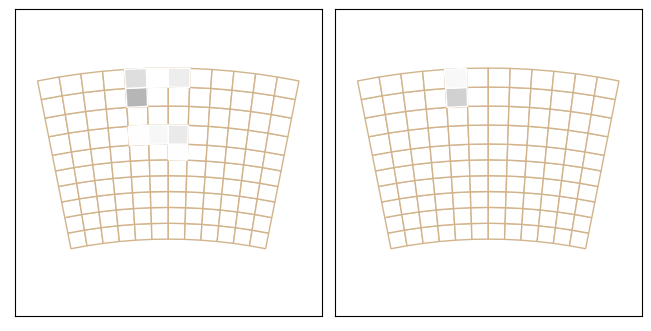

event 71000 22 has no bcal hits
event 71000 23 has no bcal hits
event 71000 24 has no bcal hits
display event 71000 25 with neutron kinetic energy 0.392 GeV


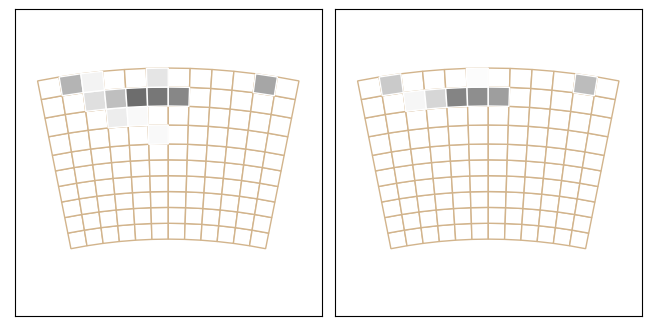

display event 71000 26 with neutron kinetic energy 0.416 GeV


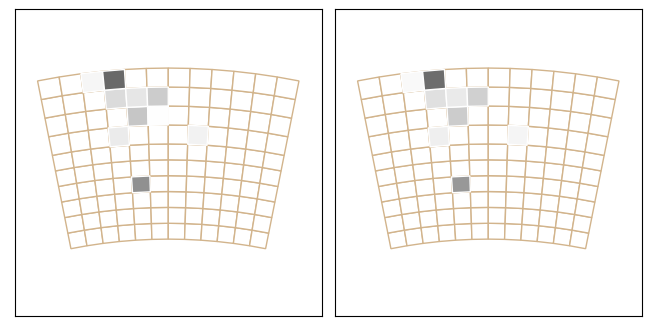

early exit after 26 events from input file particle_gun021_005.hddm


In [19]:
neutrons = "http://nod25.phys.uconn.edu:2880/Gluex/simulation/simsamples/particle_gun" +\
           "/particle_gun021_{0:03d}.hddm"
module_dphi = 2*math.pi / Nmodules
module_phi0 = -2*math.pi + module_dphi/2

logEmin_GeV = math.log(0.001)
logEmax_GeV = math.log(1.000)
mNeutron = 0.939565346

showedges = True

def Escaled(E_GeV):
    """
    Return a value representing the energy deposited by a neutron
    in a BCAL sector, on a scale (0,1).
    """
    return (math.log(E_GeV) - logEmin_GeV) / (logEmax_GeV - logEmin_GeV) 
    
for n in range(5):
    try:
        url = neutrons.format(n+1)
        hddmfile = wget.download(url)
        nevents = 0
        for evt in hddm_s.istream(hddmfile):
            sectors = [{}, {}]
            for pe in evt.getPhysicsEvents():
                nevents += 1
                for mom in evt.getMomenta():
                    pperp = (mom.px**2 + mom.py**2)**0.5
                    labtheta = math.atan2(pperp, mom.pz)
                    if labtheta < 15 * math.pi/180:
                        continue
                    labphi = math.atan2(mom.py, mom.px)
                    module0 = int((labphi - module_phi0) / module_dphi) % Nmodules + 2
                    Ekin = mom.E - mNeutron
                for cell in evt.getBcalCells():
                    if abs(cell.module - module0) > 1 and abs(cell.module - module0) < Nmodules - 1:
                        continue
                    dmod = (cell.module - module0 + Nmodules + 5) % Nmodules - 5
                    mls = f"{dmod}:{cell.layer - 1}:{cell.sector - 1}"
                    for hit in cell.getBcalSiPMUpHits():
                        sectors[0][mls] = Polygon(corners[mls], edgecolor='w',
                                                  facecolor=colormap(Escaled(hit.E)))
                    for hit in cell.getBcalSiPMDownHits():
                        sectors[1][mls] = Polygon(corners[mls], edgecolor='w',
                                                  facecolor=colormap(Escaled(hit.E)))
            if len(sectors[0]) > 0 or len(sectors[1]) > 0:
                print(f"display event", pe.runNo, pe.eventNo,
                      f"with neutron kinetic energy {Ekin:.3f} GeV")
                fig,ax = plt.subplots(ncols=2, constrained_layout=True)
                if showedges:
                    for mls in corners:
                        p0 = Polygon(corners[mls], edgecolor='tan', facecolor='w')
                        p1 = Polygon(corners[mls], edgecolor='tan', facecolor='w')
                        ax[0].add_patch(p0)
                        ax[1].add_patch(p1)
                for mls in sectors[0]:
                    ax[0].add_patch(sectors[0][mls])
                for mls in sectors[1]:
                    ax[1].add_patch(sectors[1][mls])
                for end in (0,1):
                    ax[end].set_xlim([-20,20])
                    ax[end].set_ylim([55,95])
                    ax[end].set_aspect("equal")
                    ax[end].set_xticks([])
                    ax[end].set_yticks([])
                plt.savefig(f"GANsim/images/f{n}e{pe.eventNo}u.png", dpi=45,
                            bbox_inches=mtransforms.Bbox([[0.03,0.2],[0.48,0.8]]).transformed(
                                (fig.transFigure - fig.dpi_scale_trans)))
                plt.savefig(f"GANsim/images/f{n}e{pe.eventNo}d.png", dpi=45,
                            bbox_inches=mtransforms.Bbox([[0.52,0.2],[0.97,0.8]]).transformed(
                                (fig.transFigure - fig.dpi_scale_trans)))
                plt.show()
            else:
                print(f"event", pe.runNo, pe.eventNo, "has no bcal hits")
            if pe.eventNo > 25:
                raise Exception("done with this input file")
    except:
        print(f"early exit after {nevents} events from input file {hddmfile}")
    finally:
        if os.path.isfile(hddmfile):
            os.remove(hddmfile)